# AV - HR

In [3]:
#Data cleaning and Data Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#time
import time 
import warnings
warnings.filterwarnings('ignore')

#label encoder
from sklearn.preprocessing import LabelEncoder

#Modeling: classification algo
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

#splitting the data
from sklearn.model_selection import train_test_split

#Evaluation 
from sklearn.metrics import accuracy_score

#standardization
from sklearn.preprocessing import StandardScaler

#Cross Validation
from sklearn.model_selection import cross_val_score

#Random Search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [4]:
hr_df = pd.read_csv("train_LZdllcl.csv")
hr_df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# EDA

In [3]:
print(f"The Numbers of Rows and Columns in this dataset are: \
{hr_df.shape[0]} rows and {hr_df.shape[1]} columns.")

The Numbers of Rows and Columns in this dataset are: 54808 rows and 14 columns.


In [4]:
#checking the data type of column 
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
#statistical summary 
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [6]:
#null check 
hr_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
#total no. of rows which conatins null value/values.
def total_null_rows():
    """
    To find: The Rows which contain null values in either "education" or "previous_year_rating".
    """
    both_have_null = 0
    total_null_rows = 0
    for count in range(hr_df.shape[0]):
        if hr_df['education'].isnull()[count] == True and hr_df['previous_year_rating'].isnull()[count] == True:
            both_have_null += 1
        if hr_df['education'].isnull()[count] == True or hr_df['previous_year_rating'].isnull()[count] == True:
            total_null_rows += 1
            
    print(f"The Total No. of Rows contain null values are {total_null_rows}.")
    print(f"Contains two null in single row are {both_have_null}")
        
total_null_rows()
#missing values are quite high so we have to impute them(not drop them).

The Total No. of Rows contain null values are 6148.
Contains two null in single row are 385


In [8]:
#unique values for each column
def unique_count():
    """
    To Count: All the unique values for each column in the dataset.
    """
    lst = []
    for column in hr_df.columns:
        count = 0 
        for value in hr_df[column].unique():
            count += 1
        lst.append({"Column":column, "Unique Values": count})
        
    return pd.DataFrame(data=lst, columns=["Column", "Unique Values"])
unique_count()
#employee id is same as index(we can remove this).

,Column,Unique Values
0,employee_id,54808
1,department,9
2,region,34
3,education,4
4,gender,2
5,recruitment_channel,3
6,no_of_trainings,10
7,age,41
8,previous_year_rating,6
9,length_of_service,35


In [9]:
def percentage_moi():
    """
    To calculate percentage of most occured item in categorical data
    """
    def percentage(values):
        return round((values/hr_df.shape[0])*100,2)
    
    lists = ["department","education","region","gender","recruitment_channel"]
    
    mostly_occurred_items = []
    values = []
    df =[]
    i = 0
     
    for items in lists:
        value_counts =  hr_df[items].value_counts()
        
        for item, value in value_counts.items():            
            mostly_occurred_items.append(item)
            values.append(value)
            break
            
        values = list(map(percentage,values))
        df.append({
            "Categorical data":items,
            "Most occurred Category":mostly_occurred_items[i],
            "Percentage (%)":values[i]})
        i += 1
        
    return pd.DataFrame(df,columns=["Categorical data","Most occurred Category","Percentage (%)"])

percentage_moi()

,Categorical data,Most occurred Category,Percentage (%)
0,department,Sales & Marketing,30.73
1,education,Bachelor's,66.90
2,region,region_2,22.52
3,gender,m,70.24
4,recruitment_channel,other,55.55


## Univariate Analysis

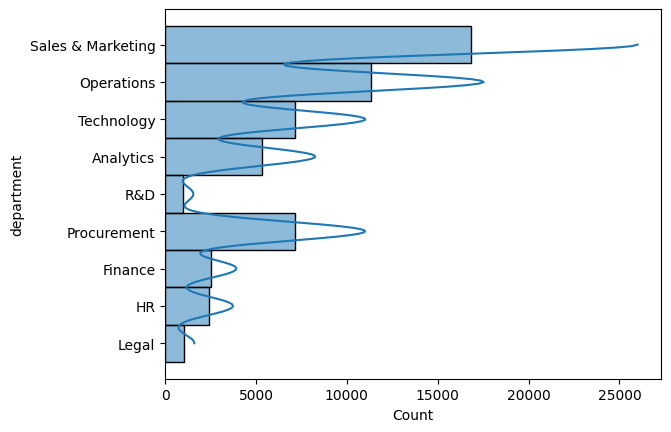

In [10]:
#department
sns.histplot(data=hr_df, y='department',kde=True);
# plt.xticks(rotation=45)
# plt.show()

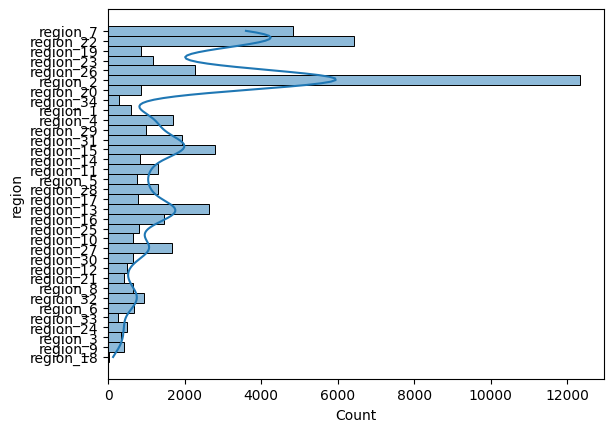

In [11]:
#region
sns.histplot(data=hr_df, y='region',kde=True);

In [5]:
#Replacing the missing value with Mode Value in education column.
hr_df['education'] = hr_df['education'].fillna(hr_df['education'].mode()[0])
#checking
hr_df['education'].isnull().sum()

0

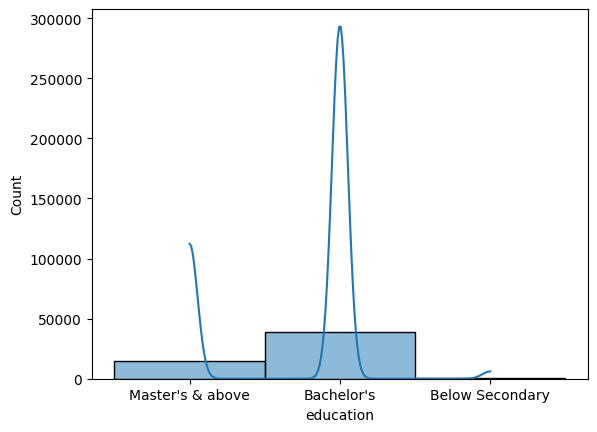

In [13]:
#education
sns.histplot(data=hr_df, x='education',kde=True);

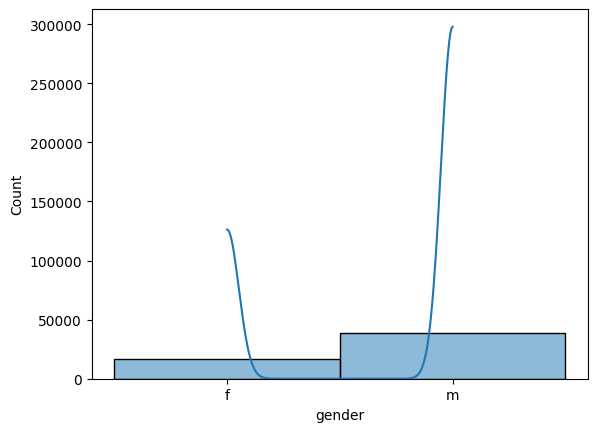

In [14]:
#gender
sns.histplot(data=hr_df,x='gender',kde=True);

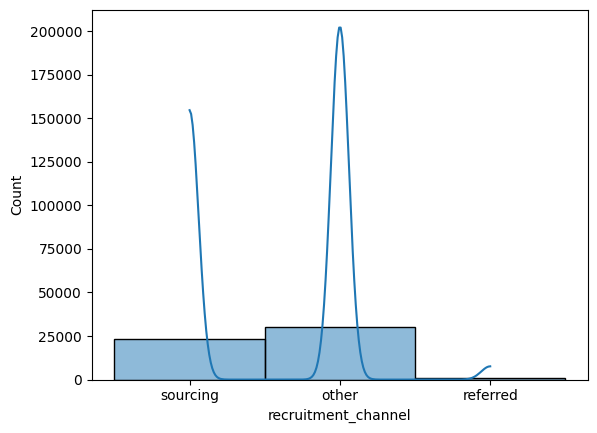

In [15]:
#recruitment_channel
sns.histplot(hr_df,x='recruitment_channel',kde=True);

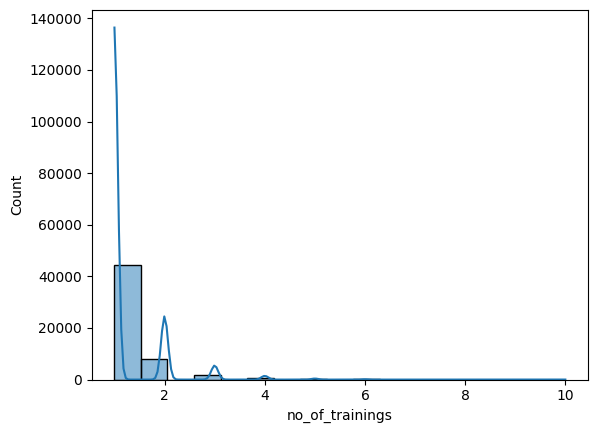

In [16]:
#no_of_trainings
sns.histplot(hr_df,x='no_of_trainings',kde=True);

In [17]:
hr_df['no_of_trainings'].value_counts()
#highly biased

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

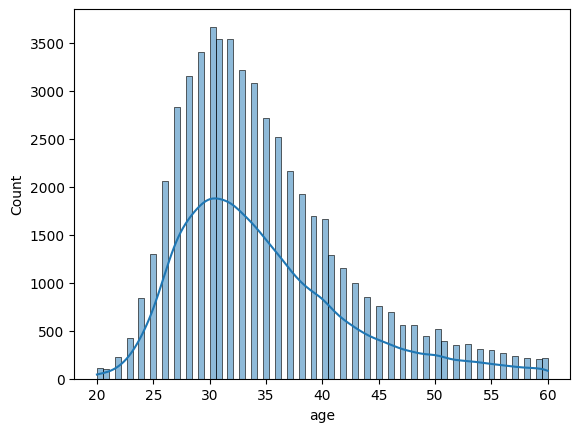

In [18]:
#age
sns.histplot(hr_df,x='age',kde=True);

In [19]:
hr_df['age'].value_counts()[:5]
#top 5 age

age
30    3665
32    3534
31    3534
29    3405
33    3210
Name: count, dtype: int64

In [6]:
#Replacing the missing value with Mean Value in previous_year_rating column.
#The Distribution is not skewed that why imputing with mean and not with median.
hr_df['previous_year_rating'] = hr_df['previous_year_rating'].fillna(round(hr_df['previous_year_rating'].mean()))
#checking
hr_df['previous_year_rating'].isnull().sum()
#no null value in the dataset now.

0

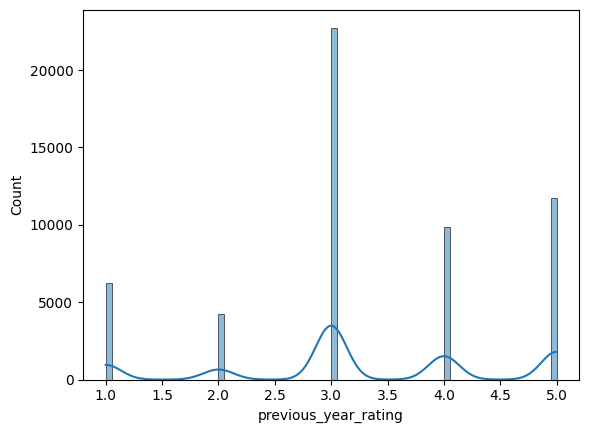

In [21]:
#previous_year_rating
sns.histplot(hr_df,x='previous_year_rating',kde=True);

In [22]:
hr_df['previous_year_rating'].value_counts()
#this is the reason to impute single digit value. 

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

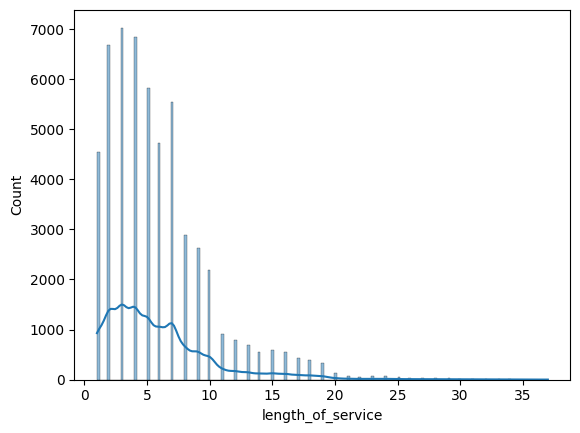

In [23]:
#length_of_service 
sns.histplot(hr_df,x='length_of_service',kde=True);

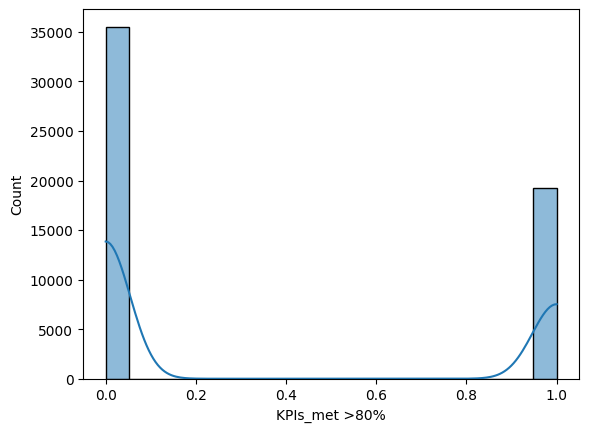

In [24]:
#KPIs_met >80%
sns.histplot(hr_df,x='KPIs_met >80%',kde=True);

In [25]:
hr_df['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

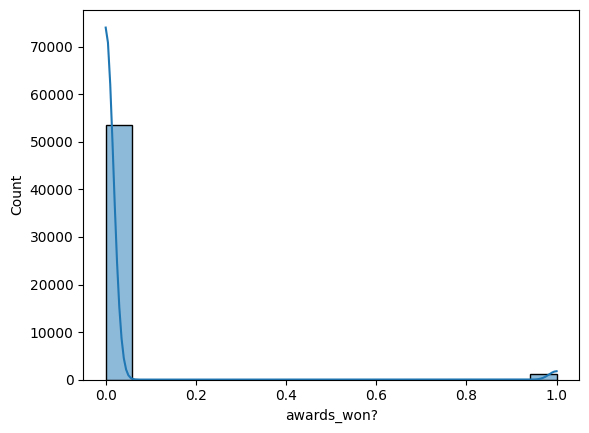

In [26]:
#awards_won?
sns.histplot(hr_df,x="awards_won?",kde=True);

In [27]:
hr_df['awards_won?'].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

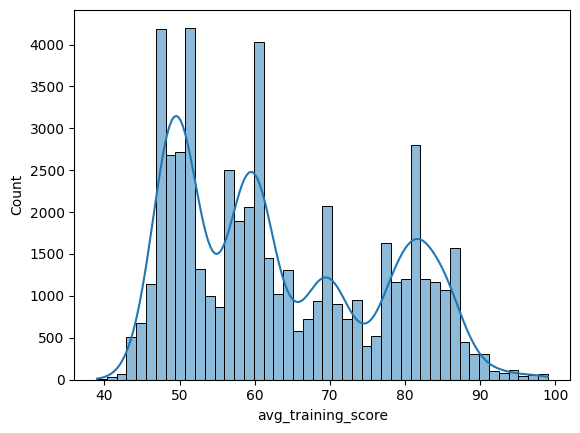

In [28]:
#avg_training_score
sns.histplot(hr_df,x='avg_training_score',kde=True);

## Multivariate Analysis:

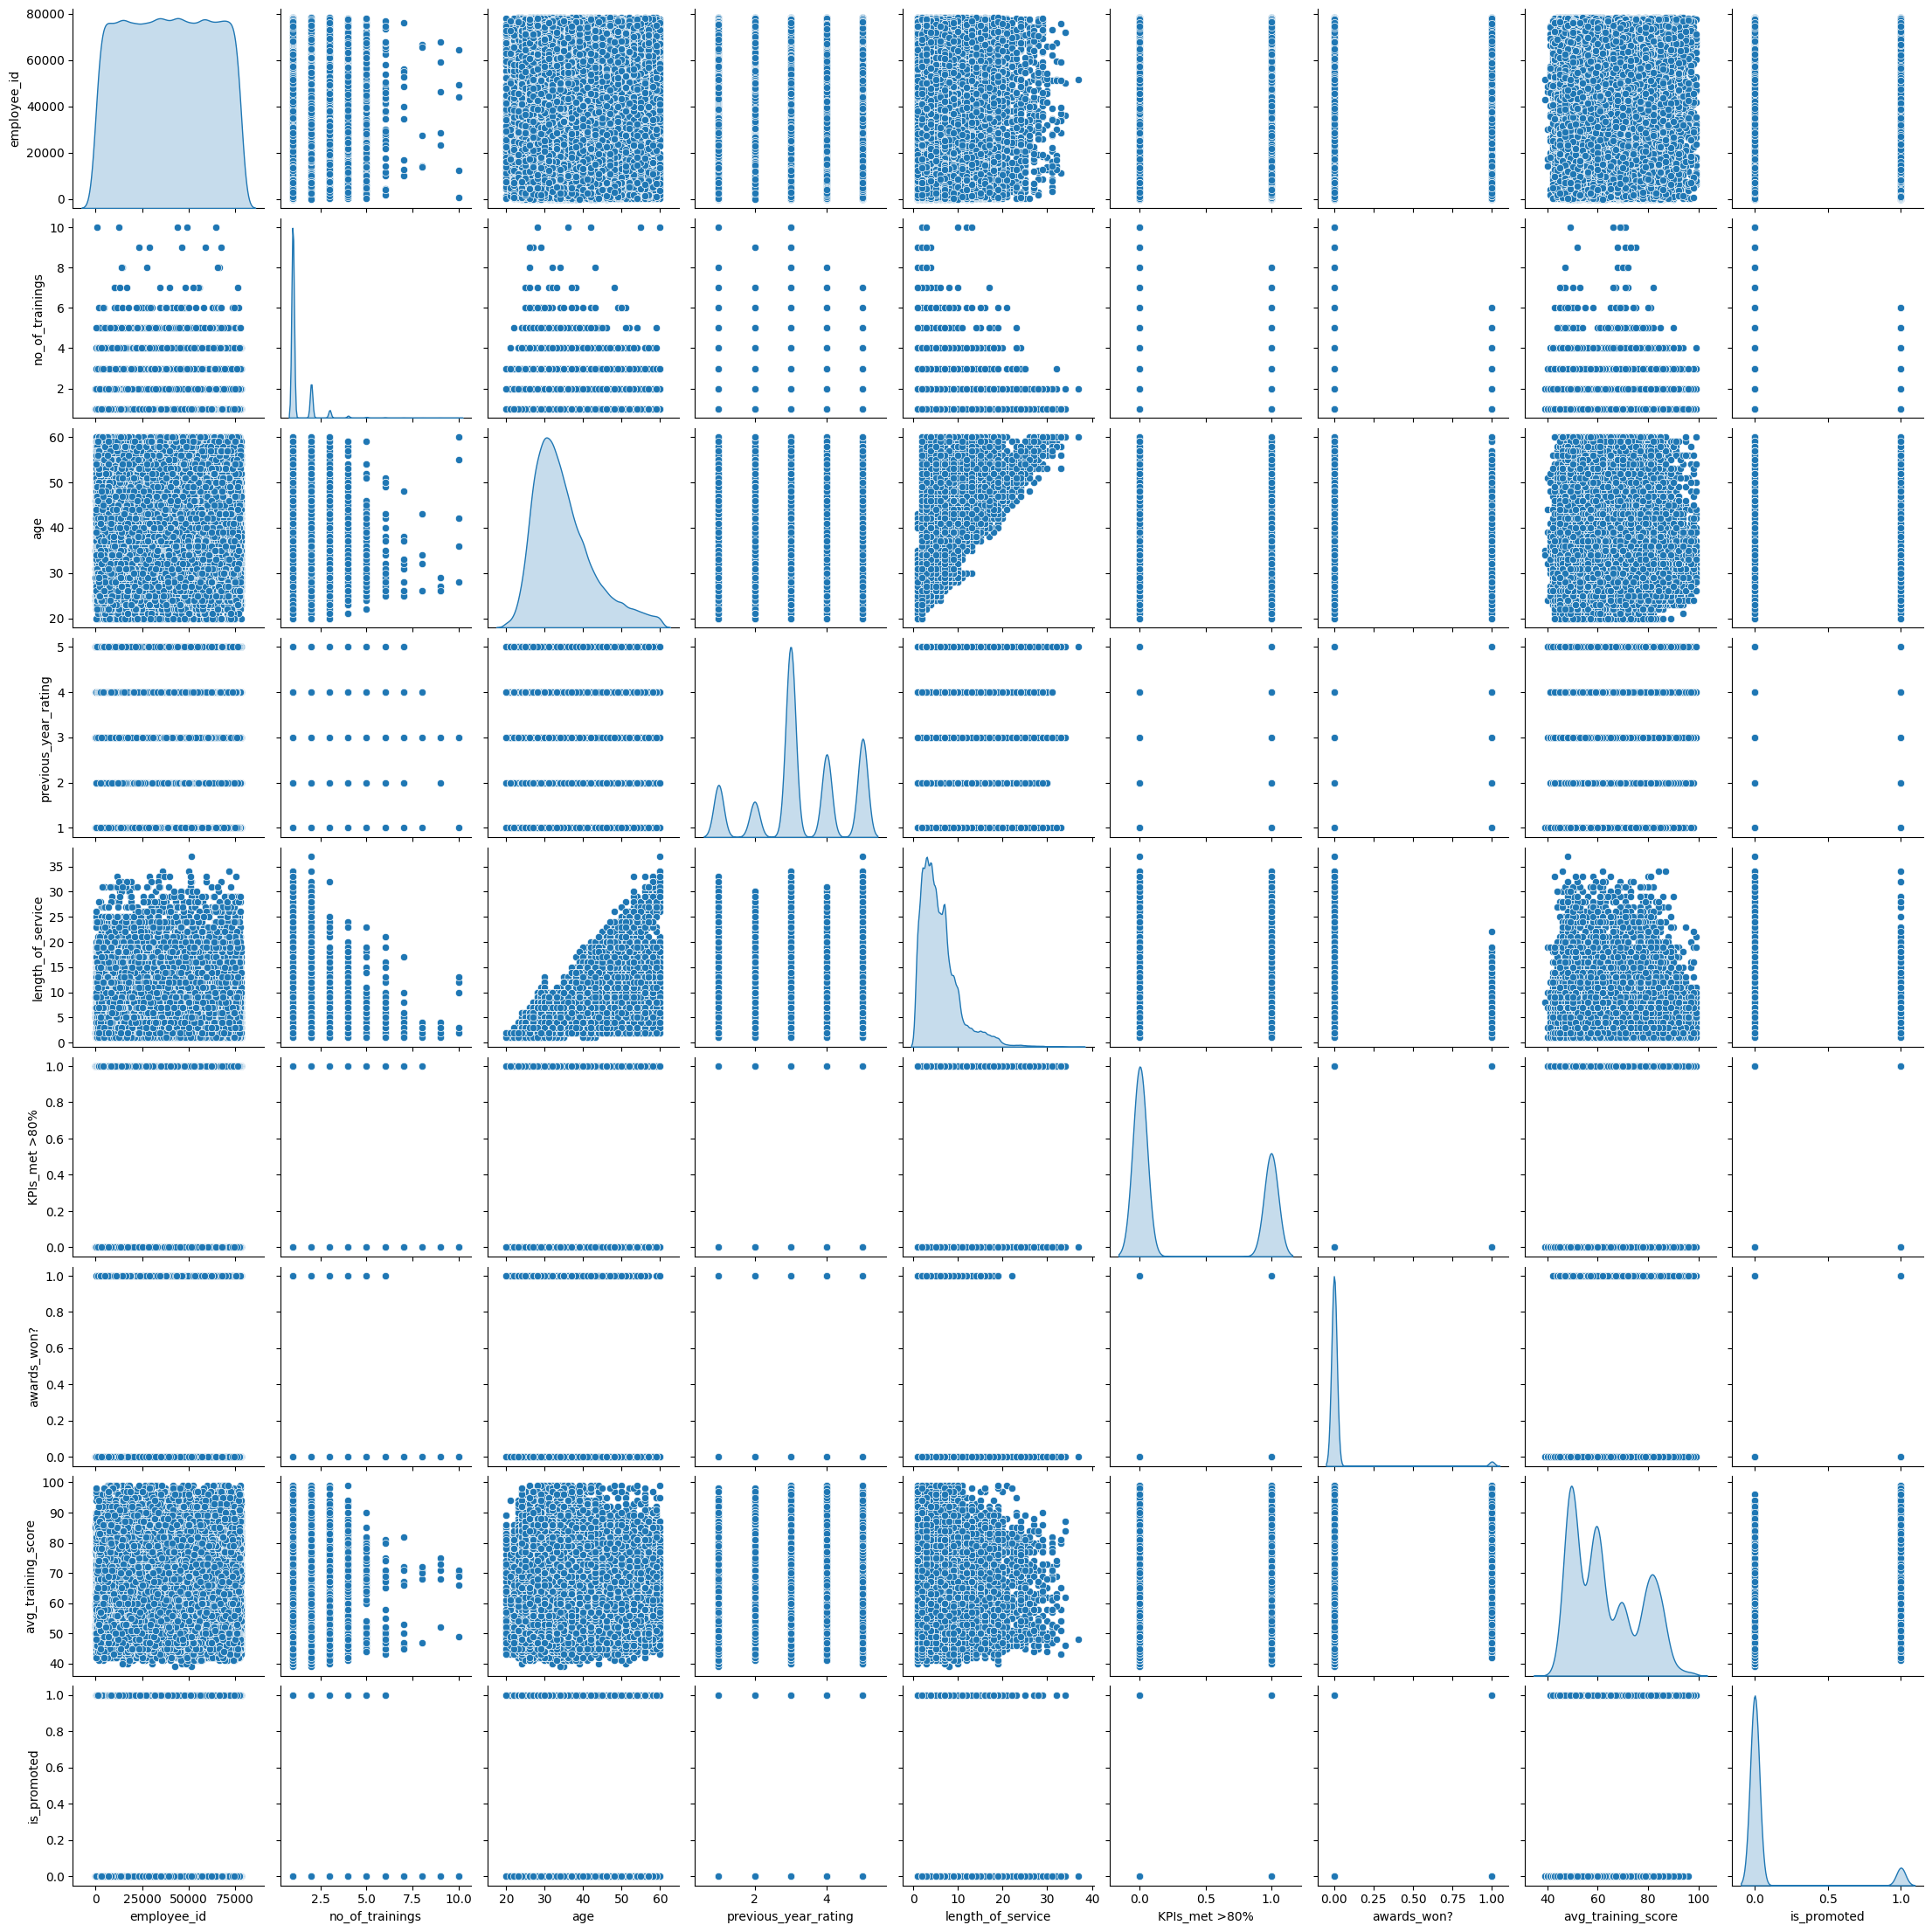

In [29]:
#checking the correaltion matrix
sns.pairplot(hr_df, diag_kind="kde");
#kde: https://en.wikipedia.org/wiki/Kernel_density_estimation 

In [7]:
#Droping employee_id 
clean_hr_df = hr_df.drop(['employee_id'],axis=1)

#label_encoding
def label_encoding():
    """
    converting categoricaL values in number by using label encoder
    """
    categoricaL_list = ["department","education","region","gender","recruitment_channel"]
    label = LabelEncoder()
    for col in categoricaL_list:
        clean_hr_df[col] = label.fit_transform(clean_hr_df[col])

label_encoding()

In [8]:
clean_hr_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


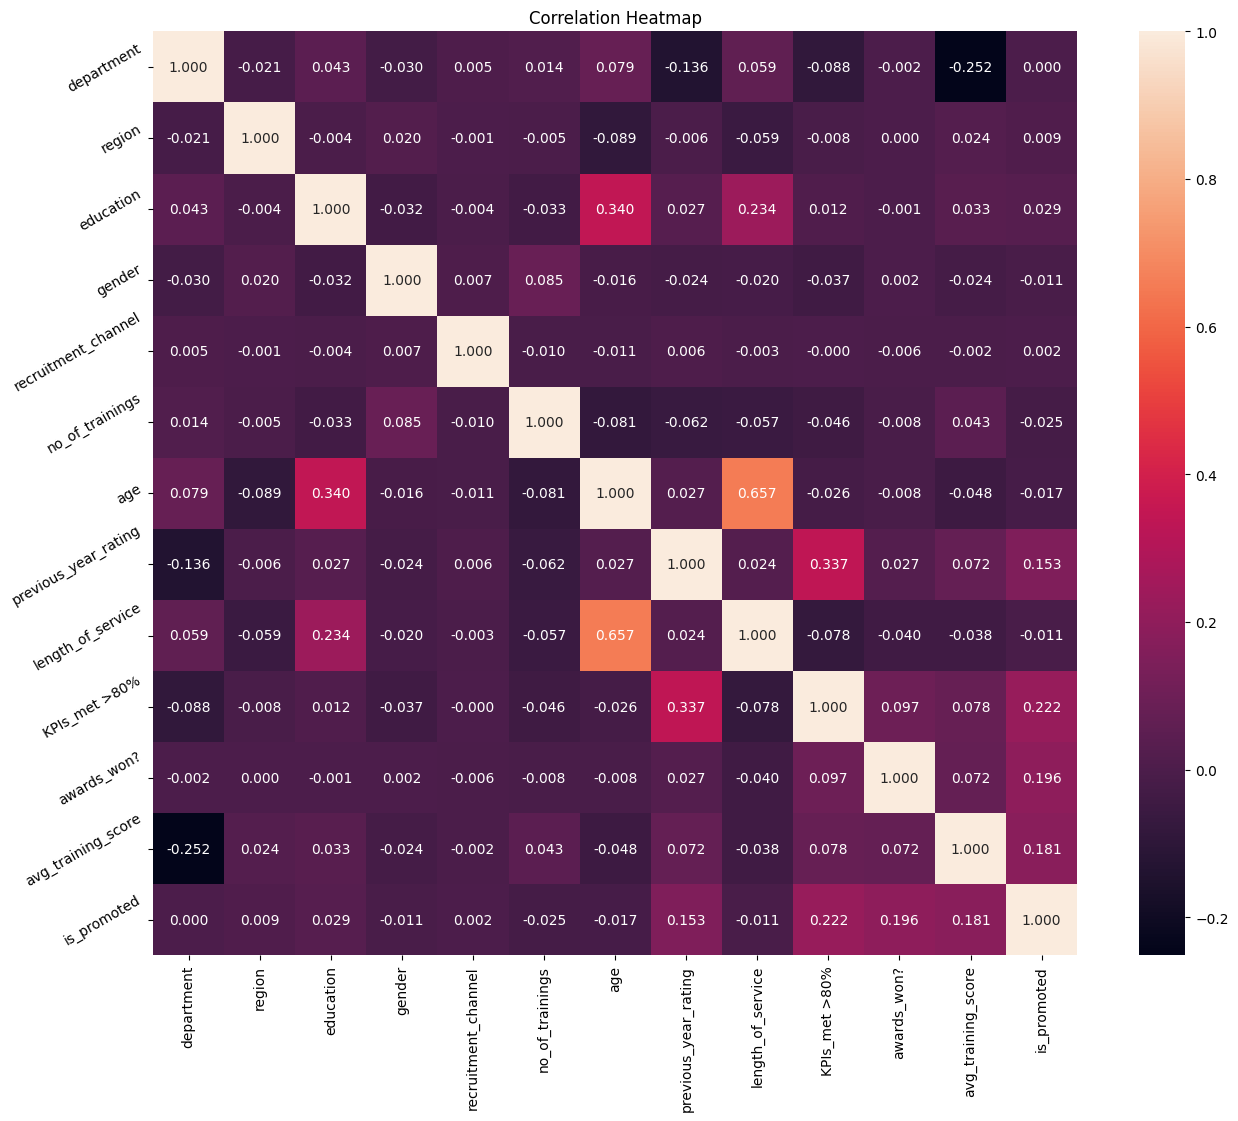

In [32]:
#creating correlation matrix
corr = clean_hr_df.corr()

#plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show();

In [33]:
corr['is_promoted'].sort_values(ascending=False)

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.153230
education               0.029257
region                  0.008841
recruitment_channel     0.002229
department              0.000130
length_of_service      -0.010670
gender                 -0.011109
age                    -0.017166
no_of_trainings        -0.024896
Name: is_promoted, dtype: float64

# Modeling and Evaluation

In [34]:
def first_model(df):
    """
    Only standardization on features
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    
    # Feature Scaling
    sc = StandardScaler()
    standard_features = sc.fit_transform(features)
    
    X_train, X_test, y_train, y_test = train_test_split(standard_features,target,test_size=0.3, \
                                                        stratify=target, random_state=42)
    
    models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), \
              RandomForestClassifier(), xgb.XGBClassifier()]
    model_df = []
    
    for model in models:
        classifier = model
        model.fit(X_train,y_train)
        training_predict = model.predict(X_train)
        training_score = round(accuracy_score(training_predict,y_train)*100,2)
        test_predict = model.predict(X_test)
        test_score = round(accuracy_score(test_predict,y_test)*100,2)
        model_df.append({"Model":classifier,"Accuracy on Training": training_score,"Accuracy on Testing":test_score})
        
    model_df = pd.DataFrame(model_df,columns=["Model", "Accuracy on Training", "Accuracy on Testing"])
    
    return model_df

first_model(clean_hr_df)

,Model,Accuracy on Training,Accuracy on Testing
0,LogisticRegression(),91.71,91.78
1,DecisionTreeClassifier(),99.98,89.46
2,KNeighborsClassifier(),93.14,91.46
3,SVC(),92.37,92.35
4,"(DecisionTreeClassifier(max_features='sqrt', r...",99.98,93.37
5,"XGBClassifier(base_score=None, booster=None, c...",95.14,94.11


In [35]:
def second_model(df):
    """
    Selection of Hyperparameter
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    
    # Feature Scaling
    sc = StandardScaler()
    standard_features = sc.fit_transform(features)

    model_df = []

    models = {
        "Logistic Regression":{
            "model": LogisticRegression(max_iter=1000,multi_class='auto'), 
            "parameters":{
                "solver":['newton-cg', 'lbfgs'], 
                "C":[100, 10, 1.0, 0.1, 0.01], 
                "penalty": ['none','l2', 'elasticnet']
            }},
        "Decision Tree Classifier":{ 
            "model":DecisionTreeClassifier(splitter='best'), 
            "parameters":{ 
                'criterion': ['gini', 'entropy'],
                'max_depth': [1, 5, 10]
            }},
        "K-Nearest Neighbors":{
            "model": KNeighborsClassifier(),
            "parameters": {
                'n_neighbors':range(1, 21, 2),
                'weights':['uniform', 'distance'],
                'metric':['euclidean', 'manhattan', 'minkowski']
             }},
        "Support Vector Machine":{
            "model":SVC(gamma='scale'),
            "parameters": {
                'kernel':['poly', 'rbf', 'sigmoid'],
                'C':[50, 10, 1.0, 0.1, 0.01]
            }},
        "Random Forest":{
            "model":RandomForestClassifier(criterion='gini'),
            "parameters":{
                'n_estimators':[10,100,1000],
                'max_features':['sqrt', 'log2']
            }},
        "XGBoost":{
            'model':xgb.XGBClassifier(objective='binary:logistic',booster='gbtree'),
            'parameters':{
                'gamma':[0,0.1,0.2,0.4,0.8,1,2,4,10,50,100],
                'learning_rate':[0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25,0.3,0.5,0.8],
                'max_depth': [1,2,5,6,7,8],
                'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2],
                'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2]
            }}
        }

    for model_name, model_params in models.items():
        rs_cv = RandomizedSearchCV(model_params['model'], model_params['parameters'], cv = 5, return_train_score=False)
        rs_cv.fit(standard_features, target)
        model_df.append(
        {
            'model': model_name,
            'best_parameters': rs_cv.best_params_,
            'score': rs_cv.best_score_
        })

    return pd.DataFrame(model_df, columns=['model','best_parameters','score'])

begin = time.time()
hyper_parameter = second_model(clean_hr_df)
end = time.time()

In [37]:
(end-begin)/3600
#more than 5hrs

5.3896924218204285

In [38]:
hyper_parameter

,model,best_parameters,score
0,Logistic Regression,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}",0.917238
1,Decision Tree Classifier,"{'max_depth': 10, 'criterion': 'entropy'}",0.936323
2,K-Nearest Neighbors,"{'weights': 'uniform', 'n_neighbors': 17, 'met...",0.920066
3,Support Vector Machine,"{'kernel': 'poly', 'C': 50}",0.924026
4,Random Forest,"{'n_estimators': 1000, 'max_features': 'log2'}",0.934499
5,XGBoost,"{'reg_lambda': 1.6, 'reg_alpha': 0.1, 'max_dep...",0.941815


In [39]:
hyper_parameter['best_parameters'].to_dict()

{0: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10},
 1: {'max_depth': 10, 'criterion': 'entropy'},
 2: {'weights': 'uniform', 'n_neighbors': 17, 'metric': 'euclidean'},
 3: {'kernel': 'poly', 'C': 50},
 4: {'n_estimators': 1000, 'max_features': 'log2'},
 5: {'reg_lambda': 1.6,
  'reg_alpha': 0.1,
  'max_depth': 5,
  'learning_rate': 0.25,
  'gamma': 4}}

In [40]:
def final_model(df):
    """
    By applying the best hyperparameter to the algorithms based on the problem, 
    the final model is used to determine the accuracy of the test and training datasets.
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    
    sc = StandardScaler()
    standard_features = sc.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(standard_features,target,
                                                test_size=0.3,stratify=target, random_state=42)
    
    models = [
        LogisticRegression(solver='lbfgs', penalty='l2', C= 10), 
        DecisionTreeClassifier(max_depth=10, criterion='entropy'), 
        KNeighborsClassifier(weights='uniform', n_neighbors=17, metric='euclidean'),
        SVC(kernel='poly', C=50), 
        RandomForestClassifier(n_estimators=1000, max_features='log2'), 
        xgb.XGBClassifier(reg_lambda=1.6,reg_alpha=0.1,max_depth=5,learning_rate=0.25,gamma=4)
    ]
    
    model_df = []
    
    for model in models:
        classifier = model
        model.fit(X_train,y_train)
        training_predict = model.predict(X_train)
        training_score = round(accuracy_score(training_predict,y_train)*100,2)
        test_predict = model.predict(X_test)
        test_score = round(accuracy_score(test_predict,y_test)*100,2)
        model_df.append({"Model":classifier, 
                         "Accuracy on Training": training_score, 
                         "Accuracy on Testing":test_score})
    
    model_df = pd.DataFrame(model_df,columns=["Model", "Accuracy on Training", 
                                              "Accuracy on Testing"])
    
    return model_df

final_model(clean_hr_df)

,Model,Accuracy on Training,Accuracy on Testing
0,LogisticRegression(C=10),91.71,91.78
1,"DecisionTreeClassifier(criterion='entropy', ma...",94.30,93.68
2,"KNeighborsClassifier(metric='euclidean', n_nei...",92.17,92.11
3,"SVC(C=50, kernel='poly')",92.52,92.53
4,"(DecisionTreeClassifier(max_features='log2', r...",99.98,93.38
5,"XGBClassifier(base_score=None, booster=None, c...",94.12,93.95


In [15]:
def cleaning_df(df):
    """
    Cleaning the test and train df
        - Both test and train dataset have null values in the education and previous_year_rating.
    """
    df['education'] = df['education'].fillna(df['education'].mode()[0])
    df['previous_year_rating'] = df['previous_year_rating'].fillna(round(df['previous_year_rating'].mean()))
    return df
    
def label_encoding(df):
    """
    Changing the labels to values using label encoding
    """
    categoricaL_list = ["department","education","region","gender","recruitment_channel"]
    label = LabelEncoder()
    for col in categoricaL_list:
        df[col] = label.fit_transform(df[col])
    return df    
    
def split_feature_target(df):
    """
    Spliting the dataframe into features and target
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    return features, target

def standard_features(df):
    """
    Standardizing features using standard scalar
    """
    sc = StandardScaler()
    standard_features = sc.fit_transform(df)
    return standard_features
    
def training(train_df,test_df):
    """
    Now using Full train and test data
    """
    #splitting
    features_df, target_df = split_feature_target(train_df)
    #cleaning
    clean_train_df = cleaning_df(features_df)
    clean_test_df = cleaning_df(test_df)
    #label encoding
    clean_label_train_df = label_encoding(clean_train_df)
    clean_label_test_df = label_encoding(clean_test_df)
    #standardizing
    standard_train_df = standard_features(clean_label_train_df)
    standard_test_df = standard_features(clean_label_test_df)
    #train test split
    X_train, Y_train, X_test = standard_train_df, target_df, standard_test_df
    #model 
    model = xgb.XGBClassifier(reg_lambda=1.6,reg_alpha=0.1,max_depth=5,learning_rate=0.25,gamma=4)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return Y_pred
    
def submission(Y_pred,test_df):
    """
    Creating csv to submission
    """
    Y_pred = Y_pred.tolist()
    y_pred = np.array(Y_pred)
    submission = pd.DataFrame({
        "employee_id": test_df['employee_id'],
        "is_promoted": Y_pred
    })
    submission.to_csv('./Submission.csv', index=False)

In [16]:
def run():
    train_df = pd.read_csv('train_LZdllcl.csv')
    test_df = pd.read_csv('test_2umaH9m.csv')
    training_output = training(train_df,test_df)
    submission(training_output, test_df)
run()
#score - 0.47